### Bogdan Bintu
### Copyright Presidents and Fellows of Harvard College, 2018.

## MaxViewer demonstration
This notebook is intenede to demonstrated the basic capabilities of the MaxViewer.

MaxViewer is a matplotlib figure consisting of two max-projection subplots in xy and xz for the current image in a list of 3d images provided.

### Navigation and contras

Zooming/panning crops the max-projection region.

Pressing 'a', 'd' changes the images.

Pressing 'x' adjusts contrast to min-max in zoomed image.

### Fitting

Press 't' to automatically get the seed points. 

This effectively searches for local maximums (3-pix cubes) and compares them with the local minimums (3-pix cubes) and selects the points for which the difference is above a brightness threshold (default=150). If the maxviewer object is mv, then change the threshold by setting: mv_.th_seed=150

Right click to manually add other seed points. Shift+Right click to delete the nearest point.

Press 'y' to automatically fit the  the seed points. 

In [3]:
import MaxViewer as mv
%matplotlib notebook
import IOTools as io

ImportError: No module named MaxViewer

<IPython.core.display.Javascript object>


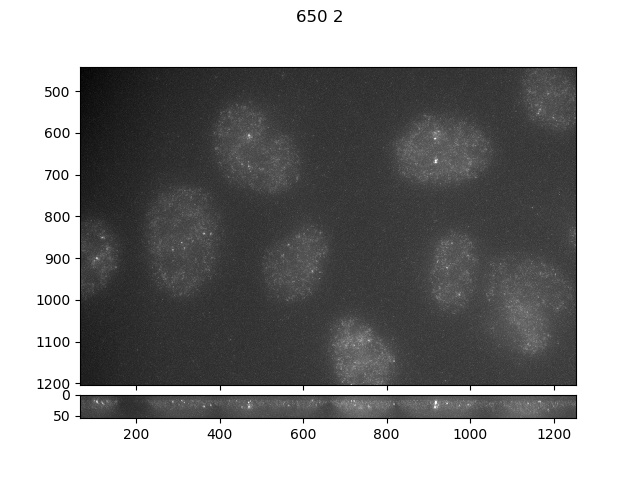

In [10]:
import glob,os
daxs = glob.glob(r'F:\20190227_g4\FISH\images\FISH_zz_04_*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[112:168],im[168:]]
    lbl_ = ['650 '+str(id_+1),'750 '+str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

In [2]:
import glob,os
daxs = glob.glob(r'F:\20190227_g4\FISH\images\FISH_yy_05_*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[:56],im[56:112]]
    lbl_ = ['telo ' +str(id_+1), 'beads ' +str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

NameError: name 'mv' is not defined

<IPython.core.display.Javascript object>


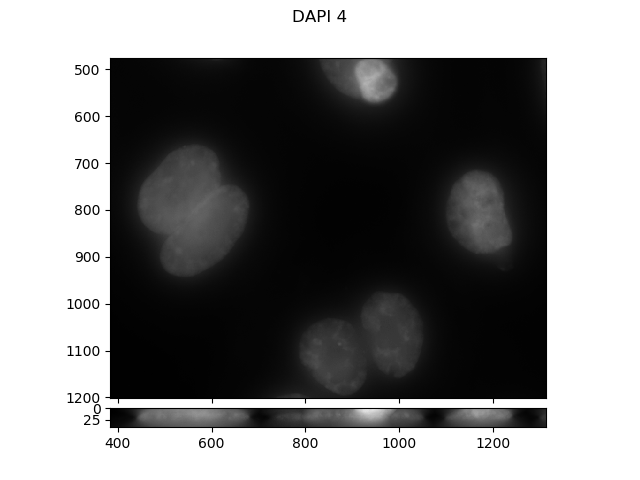

In [20]:
import glob,os
daxs = glob.glob(r'F:\20190305_post_fix_test\PFA\*.dax')
ims,lbl = [],[]
for id_,dax in enumerate(daxs):
    im = io.DaxReader(dax).loadMap()
    ims += [im[0:41],im[41:82],im[82:123],im[123:164]]
    lbl_ = ['750 hyb '+str(id_+1),'gH2AX '+str(id_+1),'telo '+str(id_+1),'DAPI '+str(id_+1)]
    lbl+=lbl_
mv_ = mv.imshow_mark_3d(ims,image_names=lbl)

In [11]:
#generate two 3d images with artificial data

ims = mv.np.random.random([2,10,20,20])*100 # background base

real_pos=[] #record the few positions 
for i in range(5):
    pos = [2+mv.np.random.random()*6, 2+mv.np.random.random()*16, 2+mv.np.random.random()*16]
    real_pos.append(pos)
    ims[0] = mv.add_source(ims[0], pos=pos, h=300, sig=[1, 1, 1]) #add the random gaussian images with height 300

FittingTools.py:200: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  im[slices_im]+=im_ker[slices_ker]*h


<IPython.core.display.Javascript object>


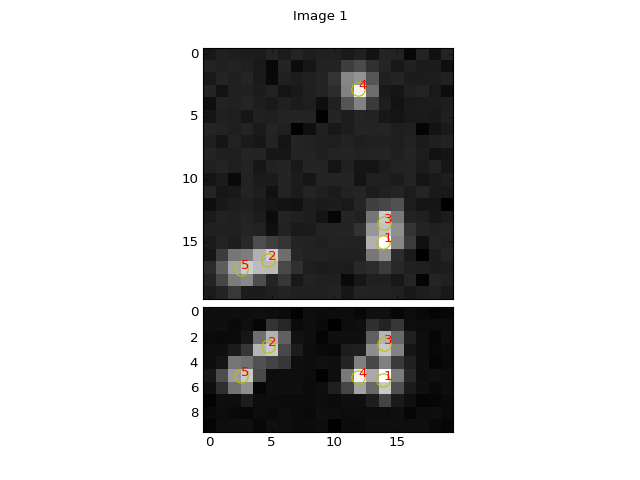

In [9]:
#get an instance of the MaxViewer and change the brightness threhold for the automatic seeding
mv_ = mv.imshow_mark_3d(ims)
mv_.th_seed=150

In [10]:
print 'true pos'
for pos in real_pos:
    print pos
    
print 'fitted pos'
for pos in mv_.pfits[:,1:4]:
    print pos

true pos
[5.089447975546375, 2.8417871729284006, 11.927688416545534]
[2.557184150455863, 13.399332444765164, 13.970631982214547]
[5.109621997056999, 17.12750995182538, 2.6428298236044174]
[2.6675298594193046, 16.52360386614317, 4.748530818585788]
[5.342850374679974, 14.978826983271597, 13.948823253778341]
fitted pos
[ 5.34199671 15.01428225 13.89799966]
[ 2.67448832 16.43857429  4.69029964]
[ 2.49507094 13.43155675 14.00551834]
[ 5.0913228   2.80624956 11.89995333]
[ 5.06864151 17.10787826  2.52860975]
